In [1]:
import networkx as nx
import numpy as np
from importlib import reload
import quality_functions as qf
import matplotlib.pyplot as plt
reload(qf)

<module 'quality_functions' from '/home/alexey/cw_send/quality_functions.py'>

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


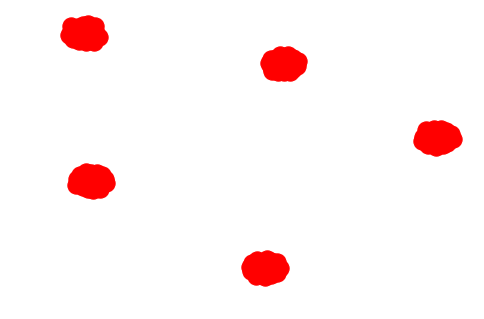

In [2]:
from utils import gen_sbm_graph, sizes_to_partition
from random import shuffle

sizes = [20 for i in range(5)]
graph = gen_sbm_graph(sizes, 1, 0)
true_partition = sizes_to_partition(sizes)
partition = true_partition.copy()
shuffle(partition)
nx.draw(graph)

In [3]:
qf.eval_functions(true_partition, graph)

UNSHUFFLED
global_density : 1.0
local_density : 1.0
distance_based : 1.0
node_membership : 1.0
SHUFFLED
global_density : 0.525625
local_density : 0.525625
distance_based : 0.6964
node_membership : 0.525625


CPU times: user 2.51 s, sys: 37.2 ms, total: 2.54 s
Wall time: 2.54 s


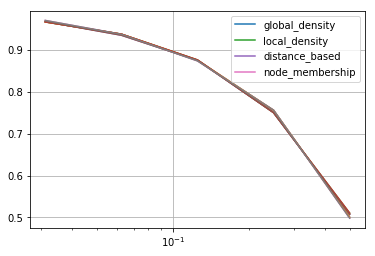

In [4]:
%%time

from quality_functions import *
from utils import gen_sbm_graph, sizes_to_partition

sizes = [50 for i in range(5)]
alphas = 2. ** np.arange(-5, 0)
n_measures = 5
for f in [global_density, local_density, distance_based, node_membership]:
    means, devs = [], []
    for alpha in alphas:
        gr = gen_sbm_graph(sizes, 1-alpha, alpha)
        partition = sizes_to_partition(sizes)
        results = [f(partition, gr) for i in range(n_measures)]
        results = np.array(results)
        means.append(results.mean())
        devs.append(results.std())
    plt.plot(alphas, means, label=f.__name__)
    plt.errorbar(alphas, means, devs)
plt.grid(True)
plt.xscale('log')
plt.legend()

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


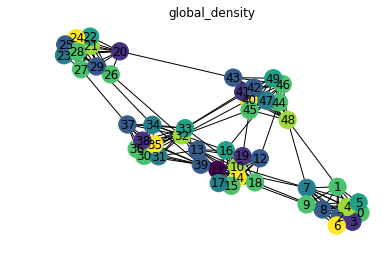

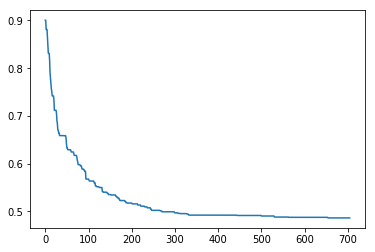

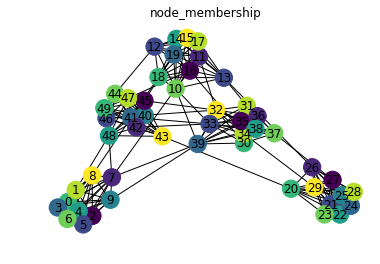

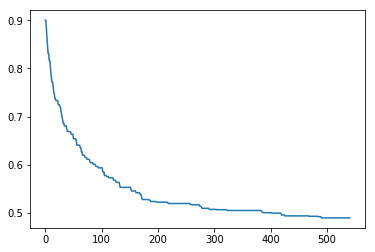

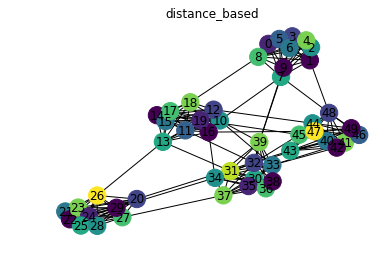

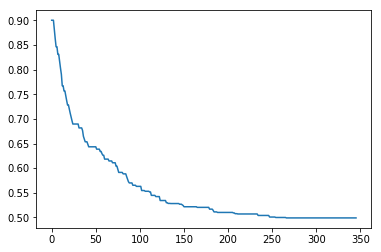

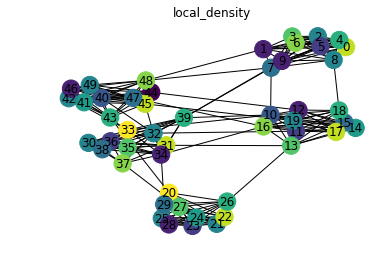

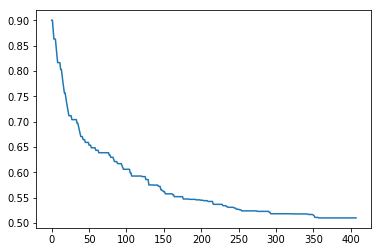

In [5]:
from importlib import reload
import quality_functions
reload(quality_functions)
from quality_functions import *

def draw_partition(graph, partition):
    dct = dict(zip(set(partition), range(len(set(partition)))))
    colors = [dct[i] for i in partition]
    nx.draw(graph, node_color=colors, with_labels=True)

graph = gen_sbm_graph([10 for i in range(5)], 0.98, 0.02)
for f in [global_density, node_membership, distance_based, local_density]:
    labels, history = quality_functions.minimize(graph, max_wait=50)
    plt.figure()
    plt.title(f.__name__)
    draw_partition(graph, labels)
    plt.figure()
    plt.plot(history)